In [1]:
# Kaggle Comprtition URL
# https://www.kaggle.com/competitions/nlp-getting-started/overview

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

dir_path = './data/'

In [2]:
train_data = pd.read_csv(dir_path + 'train.csv')
test_data = pd.read_csv(dir_path + 'test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_target_count = train_data["target"].value_counts()
pd_train_target_count = pd.DataFrame(
        {"target": train_target_count.index, "Count": train_target_count.values}
    )
pd_train_target_count

,target,Count
0,0,4342
1,1,3271


In [8]:
train_keyword_count = train_data["keyword"].value_counts()
pd_train_target_count = pd.DataFrame(
        {"keyword": train_keyword_count.index, "Count": train_keyword_count.values}
    )
pd_train_target_count

,keyword,Count
0,fatalities,45
1,deluge,42
2,armageddon,42
3,sinking,41
4,damage,41
...,...,...
216,forest%20fire,19
217,epicentre,12
218,threat,11
219,inundation,10


In [9]:
train_keyword_target0_count = train_data[train_data["target"] == 0]["keyword"].value_counts()
train_keyword_target1_count = train_data[train_data["target"] == 1]["keyword"].value_counts()
pd_train_keyword_target0_count = pd.DataFrame(
        {"keyword": train_keyword_target0_count.index, "target_0": train_keyword_target0_count.values}
    )
pd_train_keyword_target1_count = pd.DataFrame(
        {"keyword": train_keyword_target1_count.index, "target_1": train_keyword_target1_count.values}
    )

In [10]:
pd_train_keyword_target0_count

,keyword,target_0
0,body%20bags,40
1,harm,37
2,armageddon,37
3,wrecked,36
4,ruin,36
...,...,...
213,typhoon,1
214,suicide%20bombing,1
215,suicide%20bomber,1
216,outbreak,1


In [11]:
pd_train_keyword_target1_count

,keyword,target_1
0,derailment,39
1,wreckage,39
2,outbreak,39
3,debris,37
4,oil%20spill,37
...,...,...
215,blazing,1
216,epicentre,1
217,body%20bag,1
218,electrocute,1


In [12]:
pd_train_keyword_target_count = pd.merge(
    pd_train_keyword_target0_count,
    pd_train_keyword_target1_count,
    on="keyword",
    how="outer"
)

pd_train_keyword_target_count.fillna(0, inplace=True)
pd_train_keyword_target_count

,keyword,target_0,target_1
0,body%20bags,40.0,1.0
1,harm,37.0,4.0
2,armageddon,37.0,5.0
3,wrecked,36.0,3.0
4,ruin,36.0,1.0
...,...,...,...
216,outbreak,1.0,39.0
217,oil%20spill,1.0,37.0
218,derailment,0.0,39.0
219,wreckage,0.0,39.0


In [13]:
pd_train_keyword_target_count["target_1_ratio"] = pd_train_keyword_target_count["target_1"] / (pd_train_keyword_target_count["target_0"] + pd_train_keyword_target_count["target_1"])
pd_train_keyword_target_count

,keyword,target_0,target_1,target_1_ratio
0,body%20bags,40.0,1.0,0.024390
1,harm,37.0,4.0,0.097561
2,armageddon,37.0,5.0,0.119048
3,wrecked,36.0,3.0,0.076923
4,ruin,36.0,1.0,0.027027
...,...,...,...,...
216,outbreak,1.0,39.0,0.975000
217,oil%20spill,1.0,37.0,0.973684
218,derailment,0.0,39.0,1.000000
219,wreckage,0.0,39.0,1.000000


In [14]:
pd_train_keyword_target_count_sorted_ratio = pd_train_keyword_target_count.sort_values(by="target_1_ratio", ascending=False)
pd_train_keyword_target_count_sorted_ratio.reset_index(drop=True, inplace=True)
pd_train_keyword_target_count_sorted_ratio

,keyword,target_0,target_1,target_1_ratio
0,debris,0.0,37.0,1.000000
1,wreckage,0.0,39.0,1.000000
2,derailment,0.0,39.0,1.000000
3,outbreak,1.0,39.0,0.975000
4,oil%20spill,1.0,37.0,0.973684
...,...,...,...,...
216,body%20bag,32.0,1.0,0.030303
217,blazing,33.0,1.0,0.029412
218,ruin,36.0,1.0,0.027027
219,body%20bags,40.0,1.0,0.024390


In [15]:
train_all_keywords = pd_train_keyword_target_count_sorted_ratio["keyword"].str.replace("%20", " ").str.split().explode()
train_all_keywords_count = train_all_keywords.value_counts()
train_all_keywords_count

keyword
emergency     5
fire          4
disaster      3
buildings     3
body          3
             ..
ambulance     1
hurricane     1
lightning     1
hail          1
aftershock    1
Name: count, Length: 229, dtype: int64

In [16]:
train_keyword_set = set(train_data["keyword"])
test_keyword_set = set(test_data["keyword"])
keyword_intersection = train_keyword_set & test_keyword_set
keyword_union = train_keyword_set | test_keyword_set
keyword_overlap_rate = len(keyword_intersection) / len(keyword_union)

In [17]:
len(keyword_intersection)

222

In [18]:
keyword_overlap_rate

1.0

In [19]:
nan_info = pd.DataFrame({
    "train_NaN_Count": train_data.isna().sum(),
    "test_NaN_Count": test_data.isna().sum()
})
nan_info

,train_NaN_Count,test_NaN_Count
id,0,0.0
keyword,61,26.0
location,2533,1105.0
target,0,NaN
text,0,0.0


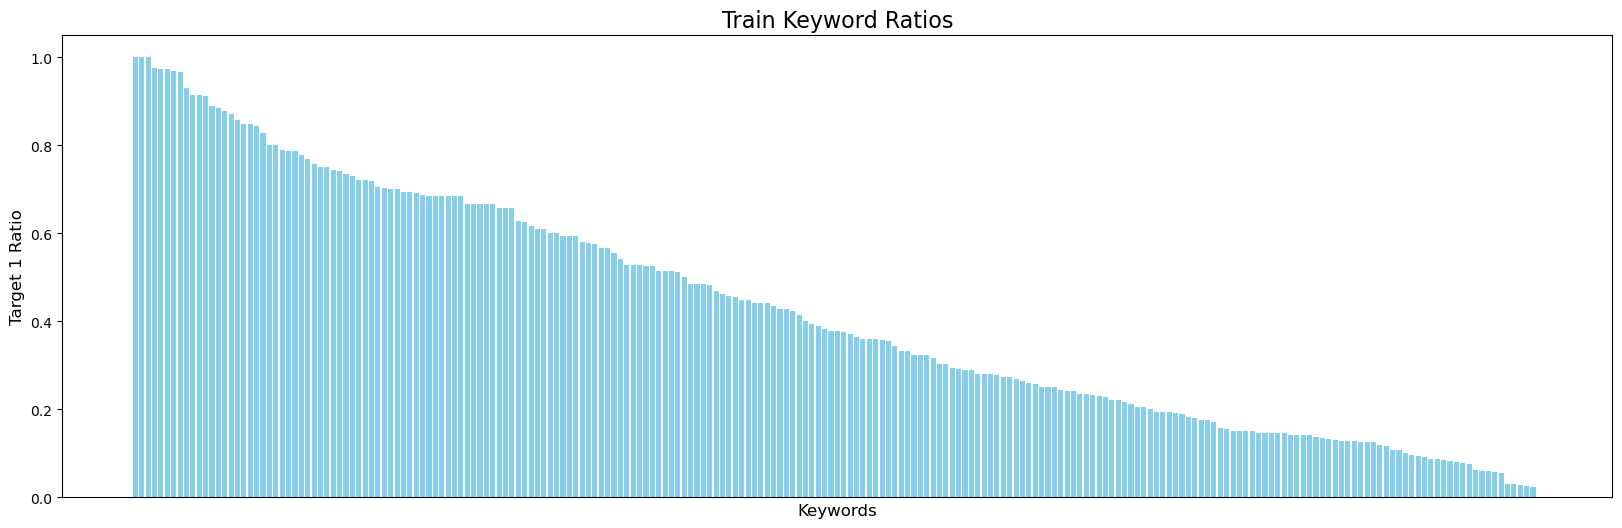

In [20]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(pd_train_keyword_target_count_sorted_ratio)), pd_train_keyword_target_count_sorted_ratio['target_1_ratio'], color='skyblue')

plt.xticks(range(len(pd_train_keyword_target_count_sorted_ratio)), pd_train_keyword_target_count_sorted_ratio['keyword'], rotation=90, fontsize=10)

plt.title('Train Keyword Ratios', fontsize=16)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Target 1 Ratio', fontsize=12)

plt.xticks([])
plt.show()

In [21]:
train_data['text_length'] = train_data['text'].apply(len)
train_data['word_count'] = train_data['text'].apply(lambda x: len(x.split()))
train_data

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


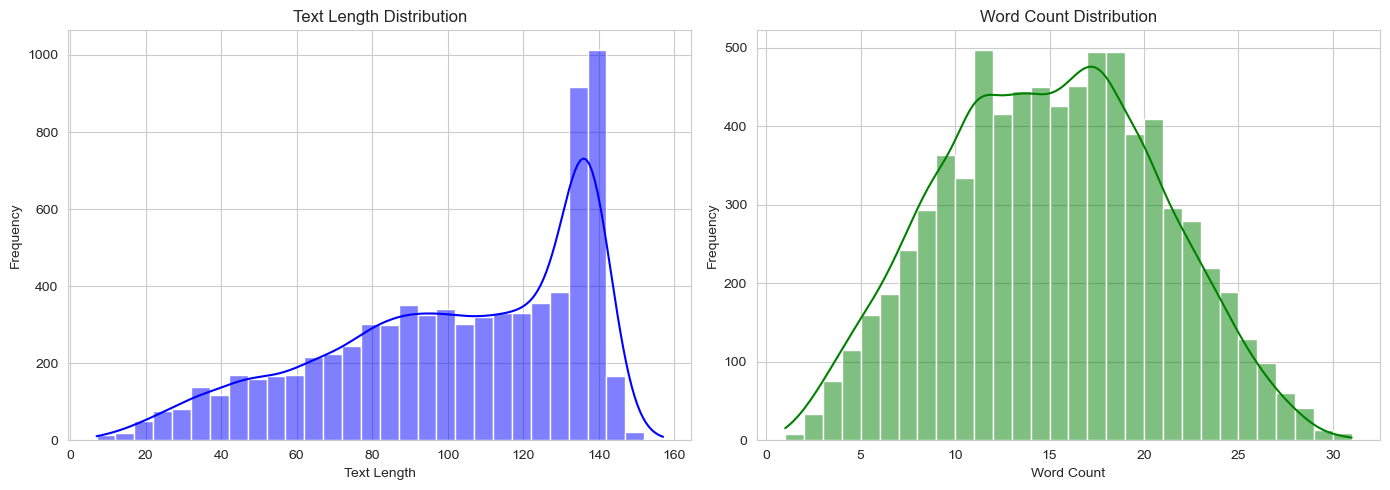

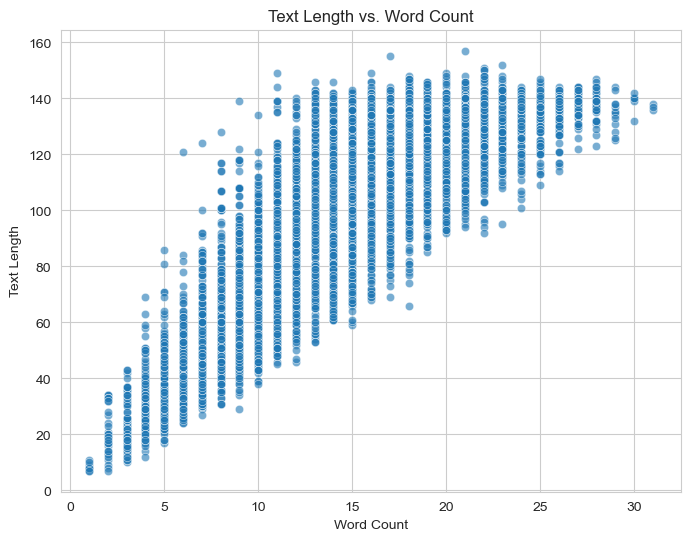

In [22]:
# 設定 Seaborn 風格
sns.set_style("whitegrid")

# 繪製 text_length 和 word_count 的直方圖
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(train_data['text_length'], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Text Length Distribution")
axes[0].set_xlabel("Text Length")
axes[0].set_ylabel("Frequency")

sns.histplot(train_data['word_count'], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Word Count Distribution")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 繪製 text_length 與 word_count 的散點圖
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data['word_count'], y=train_data['text_length'], alpha=0.6)
plt.xlabel("Word Count")
plt.ylabel("Text Length")
plt.title("Text Length vs. Word Count")
plt.show()

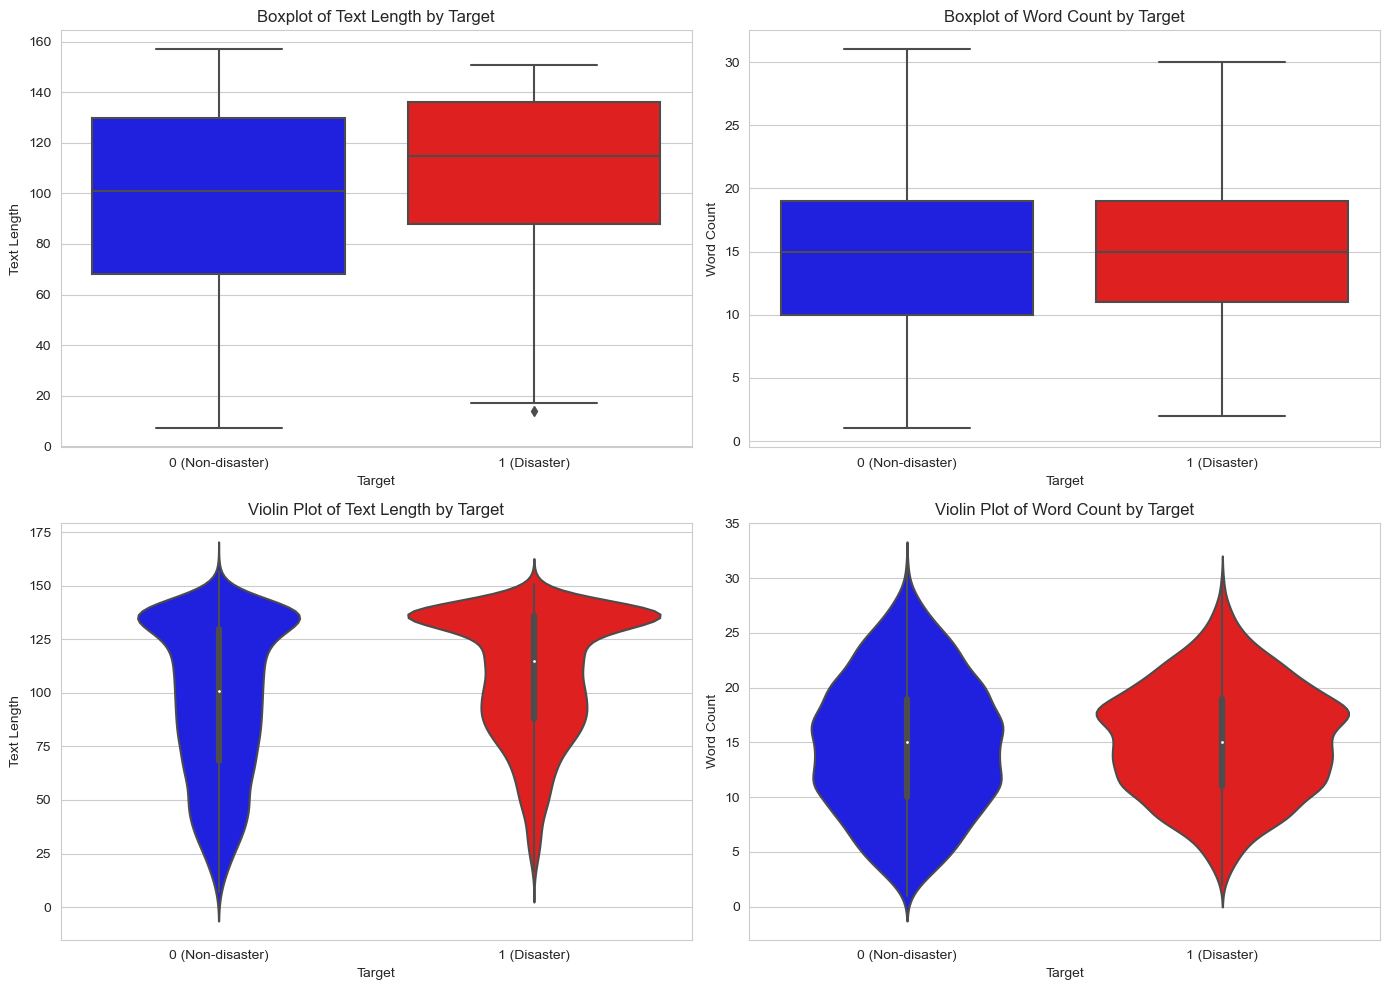

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經讀取 train_data
# df = pd.read_csv("train_data.csv")

# 設定 Seaborn 風格
sns.set_style("whitegrid")

# 創建圖表
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 繪製 text_length 的箱形圖
sns.boxplot(data=train_data, x='target', y='text_length', ax=axes[0, 0], palette=['blue', 'red'])
axes[0, 0].set_title("Boxplot of Text Length by Target")
axes[0, 0].set_xlabel("Target")
axes[0, 0].set_ylabel("Text Length")
axes[0, 0].set_xticklabels(["0 (Non-disaster)", "1 (Disaster)"])

# 2. 繪製 word_count 的箱形圖
sns.boxplot(data=train_data, x='target', y='word_count', ax=axes[0, 1], palette=['blue', 'red'])
axes[0, 1].set_title("Boxplot of Word Count by Target")
axes[0, 1].set_xlabel("Target")
axes[0, 1].set_ylabel("Word Count")
axes[0, 1].set_xticklabels(["0 (Non-disaster)", "1 (Disaster)"])

# 3. 繪製 text_length 的 Violin Plot
sns.violinplot(data=train_data, x='target', y='text_length', ax=axes[1, 0], palette=['blue', 'red'])
axes[1, 0].set_title("Violin Plot of Text Length by Target")
axes[1, 0].set_xlabel("Target")
axes[1, 0].set_ylabel("Text Length")
axes[1, 0].set_xticklabels(["0 (Non-disaster)", "1 (Disaster)"])

# 4. 繪製 word_count 的 Violin Plot
sns.violinplot(data=train_data, x='target', y='word_count', ax=axes[1, 1], palette=['blue', 'red'])
axes[1, 1].set_title("Violin Plot of Word Count by Target")
axes[1, 1].set_xlabel("Target")
axes[1, 1].set_ylabel("Word Count")
axes[1, 1].set_xticklabels(["0 (Non-disaster)", "1 (Disaster)"])

# 調整間距
plt.tight_layout()
plt.show()

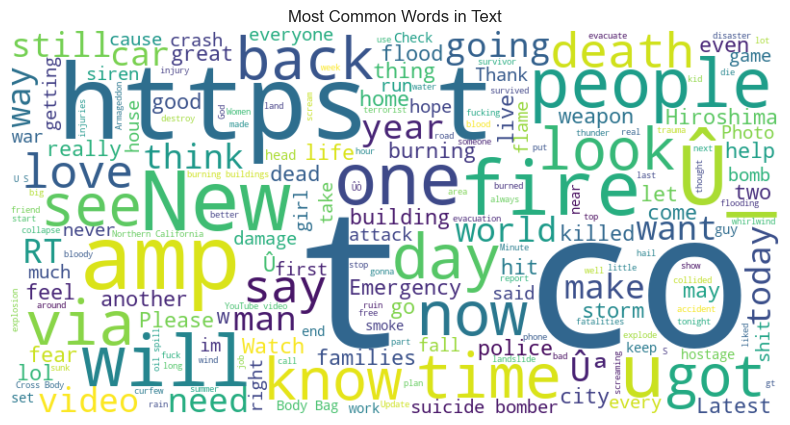

In [24]:
text_data = ' '.join(train_data['text'])

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Hiển thị WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text')
plt.show()